In [1]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

from scipy.stats import shapiro
from scipy.stats import levene
from sklearn.datasets import load_iris
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [4]:
target_df = pd.DataFrame(data=iris.target, columns=['target'])
target_df.head(3)

,target
0,0
1,0
2,0


In [5]:
df = pd.concat([iris_df, target_df], axis=1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target']

In [7]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [21]:
df['target']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [23]:
df['target'].unique()



array([0, 1, 2])

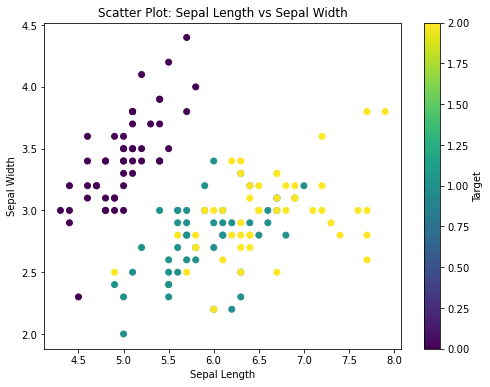

In [18]:
import matplotlib.pyplot as plt

# 데이터프레임에서 sepal_length와 sepal_width 변수 추출
sepal_length = df['sepal_length']
sepal_width = df['sepal_width']

# 산점도 그리기
plt.figure(figsize=(8, 6))
plt.scatter(sepal_length, sepal_width, c=df['target'], cmap='viridis')  # 'target' 변수를 색상으로 활용
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Scatter Plot: Sepal Length vs Sepal Width')
plt.colorbar(label='Target')
plt.show()


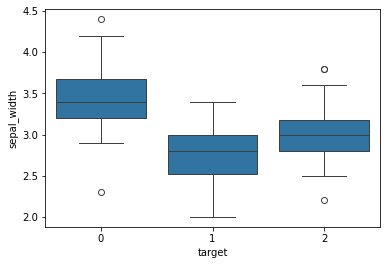

In [13]:
sns.boxplot(x='target', y='sepal_width', data=df)
plt.show()

# 일원 분산분석 (One-way ANOVA)
### 하나의 독립 변수(요인, Factor)에 대한 분산 분석을 수행
* 귀무가설 : 집단(target) 간의 sepal_width 차이가 없다.
* 대립가설 : 집단(target) 간의 sepal_width 차이가 있다.

### 정규성 검정
* 귀무가설 : 정규분포를 따른다.
* 대립가설 : 정규분포를 따르지 않는다.

In [14]:
print(shapiro(df.sepal_width[df.target==0]))
print(shapiro(df.sepal_width[df.target==1]))
print(shapiro(df.sepal_width[df.target==2]))

ShapiroResult(statistic=0.971718966960907, pvalue=0.2715126574039459)
ShapiroResult(statistic=0.9741329550743103, pvalue=0.3379843533039093)
ShapiroResult(statistic=0.9673907160758972, pvalue=0.18089871108531952)


### 등분산성 검정
* 귀무가설 : 등분산성을 만족한다.
* 대립가설 : 등분산성을 만족하지 않는다. (이분산이다.)

In [15]:
print(levene(df.sepal_width[df.target==0], df.sepal_width[df.target==1], df.sepal_width[df.target==2]))

LeveneResult(statistic=0.5902115655853319, pvalue=0.5555178984739075)


# 일원 분산분석 (One-way ANOVA)
* 귀무가설 : 집단(target) 간의 sepal_width 차이가 없다.
* 대립가설 : 집단(target) 간의 sepal_width 차이가 있다.

In [16]:
stats.f_oneway(df.sepal_width[df.target==0], df.sepal_width[df.target==1], df.sepal_width[df.target==2])

F_onewayResult(statistic=49.160040089612075, pvalue=4.492017133309115e-17)

### 결론
* 귀무가설 기각, 대립가설 채택
* 집단(target) 간의 sepal_width 차이가 있다.

### 사후분석 (Post-hoc)
* 구체적으로 어떤 차이가 나는지 검증하는 방법
* Family Wise Error Rate
  * 하나의 가설에서 1종 오류가 발생할 가능성
  * 가설 검정을 많이 할 수록 FWER은 증가

In [17]:
hsd = pairwise_tukeyhsd(df['sepal_width'], df['target'], alpha=0.05)
hsd.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
0,1,-0.658,0.001,-0.8189,-0.4971,True
0,2,-0.454,0.001,-0.6149,-0.2931,True
1,2,0.204,0.0088,0.0431,0.3649,True
